# California Housing Price Prediction

## Project Overview
This project predicts median house prices in California using machine learning regression models.

## Objective
- Build regression models (Linear, Ridge, Lasso)
- Compare model performance
- Identify key price drivers

## Dataset Info
- **Source**: California Housing Dataset (sklearn)
- **Samples**: 20,640
- **Features**: 8
- **Target**: Median house price

##  Technologies Used
- Python, Pandas, NumPy
- Scikit-learn
- Matplotlib, Seaborn

In [12]:
# Import Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load and Explore Dataset

Loading the California Housing dataset and checking basic information about it.


In [13]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [14]:
print('Dataset type:',type(housing))
print('Data shape:',housing.data.shape)
print('Feature names:',housing.feature_names)

Dataset type: <class 'sklearn.utils._bunch.Bunch'>
Data shape: (20640, 8)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [15]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [16]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [17]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [18]:
# Convert to DataFrame for easier analysis
# X contains all features, y contains target variable (price)
x = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='Price')

# Combining for complete view
df = pd.concat([x, y], axis=1)


In [19]:
type(df)

pandas.core.frame.DataFrame

In [20]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [22]:
df['Price'] = housing.target

# Dataset Overview

Let's examine the structure and basic statistics of our dataset:
- Data shape and column names
- Data types
- Missing values
- Statistical summary

In [23]:
print('Data Info:')
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [24]:
print("Statistical Summary:")
df.describe()

Statistical Summary:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [25]:
print("checking for Missing values:")
df.isnull().sum()

checking for Missing values:


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [26]:
print('Checking for Duplicate values')
df.duplicated().sum()

Checking for Duplicate values


0

# Exploratory Data Analysis (EDA)

Understanding the relationship between features and target variable through:
- Feature distributions
- Correlation analysis
- Statistical summary


In [27]:
correlation_matrix = df.corr()
correlation_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


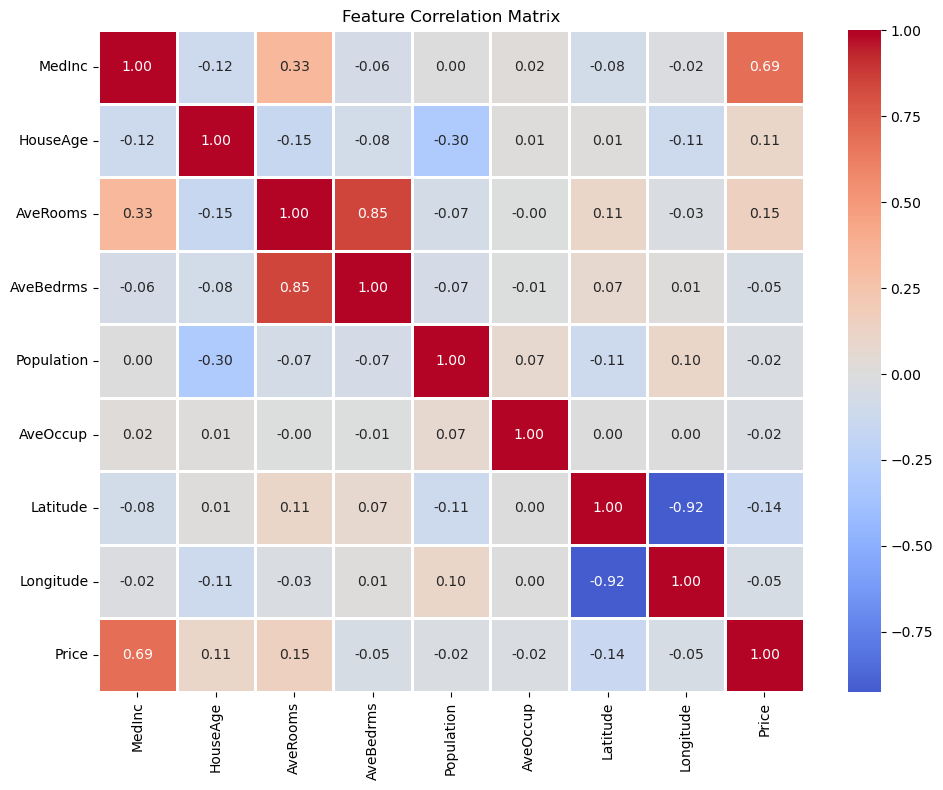

In [28]:
# Visualize correlation with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, linewidths=1)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Data Preprocessing

Preparing data for model training:
- Splitting into train (70%) and test (30%) sets
- Using StandardScaler for feature normalization
- Ensuring reproducibility with random_state=42


In [29]:
# Split data into training[70%] and testing [30%]
# random_state=42 ensures reproducibility
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=42)

print('Training set size:',x_train.shape)
print('Test set size:',x_test.shape)
print('Total samples:',x_train.shape + x_test.shape)


Training set size: (14448, 8)
Test set size: (6192, 8)
Total samples: (14448, 8, 6192, 8)


In [30]:
# Normalize features using StandardScaler
# This is important for regression models to work effectively
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit scaler on training data and transform both train and test
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print('Original x_train shape:',x_train.shape)
print('Scaled x_train shape:', x_train_scaled.shape)

Original x_train shape: (14448, 8)
Scaled x_train shape: (14448, 8)


# Model Training

Building three regression models:
1. **Linear Regression**: Baseline model without regularization 
2. **Lasso Regression**: L1 regularization with feature selection
3. **Ridge Regression**: L2 regularization to prevent overfitting

All models are trained on the same training dataset for fair comparison.


In [31]:
# Train Linear Regression model (baseline)
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(x_train_scaled, y_train)

print('Model coefficients shape:', model_lr.coef_.shape)
print('Model intercept:',model_lr.intercept_)

Model coefficients shape: (8,)
Model intercept: 2.0692396089424165


In [32]:
# Train Lasso Regression model (L1 regularization)
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=1.0)  # alpha controls regularization strength
model_lasso.fit(x_train_scaled, y_train)

print('Lasso alpha value:',model_lasso.alpha)


Lasso alpha value: 1.0


In [33]:
# Train Ridge Regression model (L2 regularization)
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=1.0)  # alpha controls regularization strength
model_ridge.fit(x_train_scaled, y_train)

print('Ridge alpha value:',model_ridge.alpha)

Ridge alpha value: 1.0


# Model Evaluation & Results

Comparing model performance using:
- **Mean Squared Error (MSE)**: Lower is better
- **Root Mean Squared Error (RMSE)**: Average prediction error in dollars
- **R² Score**: How well the model explains variance (0-1, higher is better)

Training vs Test performance helps identify overfitting.


In [34]:
# Make predictions on both training and test sets
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression predictions
y_train_pred_lr = model_lr.predict(x_train_scaled)
y_test_pred_lr = model_lr.predict(x_test_scaled)

# Ridge Regression predictions
y_train_pred_ridge = model_ridge.predict(x_train_scaled)
y_test_pred_ridge = model_ridge.predict(x_test_scaled)

# Lasso Regression predictions
y_train_pred_lasso = model_lasso.predict(x_train_scaled)
y_test_pred_lasso = model_lasso.predict(x_test_scaled)

In [35]:
# Calculate evaluation metrics for all models

# Linear Regression metrics
lr_train_mse = mean_squared_error(y_train, y_train_pred_lr)
lr_test_mse = mean_squared_error(y_test, y_test_pred_lr)
lr_train_r2 = r2_score(y_train, y_train_pred_lr)
lr_test_r2 = r2_score(y_test, y_test_pred_lr)

# Ridge Regression metrics
ridge_train_mse = mean_squared_error(y_train, y_train_pred_ridge)
ridge_test_mse = mean_squared_error(y_test, y_test_pred_ridge)
ridge_train_r2 = r2_score(y_train, y_train_pred_ridge)
ridge_test_r2 = r2_score(y_test, y_test_pred_ridge)

# Lasso Regression metrics
lasso_train_mse = mean_squared_error(y_train, y_train_pred_lasso)
lasso_test_mse = mean_squared_error(y_test, y_test_pred_lasso)
lasso_train_r2 = r2_score(y_train, y_train_pred_lasso)
lasso_test_r2 = r2_score(y_test, y_test_pred_lasso)

print("MODEL EVALUATION RESULTS")
print("-"*50)

print("\nLINEAR REGRESSION")
print('Train MSE:', lr_train_mse,'|','Test MSE:',lr_test_mse)
print('Train R²:', lr_train_r2, '|', 'Test R²:', lr_test_r2)

print("\nRIDGE REGRESSION")
print('Train MSE:',ridge_train_mse,'|', 'Test MSE:', ridge_test_mse)
print('Train R²:', ridge_train_r2, '|', 'Test R²:', ridge_test_r2)

print("\nLASSO REGRESSION")
print('Train MSE:',lasso_train_mse, '|', 'Test MSE:', lasso_test_mse)
print('Train R²:', lasso_train_r2, '|', 'Test R²:', lasso_test_r2)

MODEL EVALUATION RESULTS
--------------------------------------------------

LINEAR REGRESSION
Train MSE: 0.5233576288267756 | Test MSE: 0.5305677824766755
Train R²: 0.6093459727972159 | Test R²: 0.5957702326061662

RIDGE REGRESSION
Train MSE: 0.5233577493232345 | Test MSE: 0.5305437338152265
Train R²: 0.6093458828540788 | Test R²: 0.5957885548359448

LASSO REGRESSION
Train MSE: 1.3396959774719193 | Test MSE: 1.3125452673724591
Train R²: 0.0 | Test R²: -3.930972139576383e-06


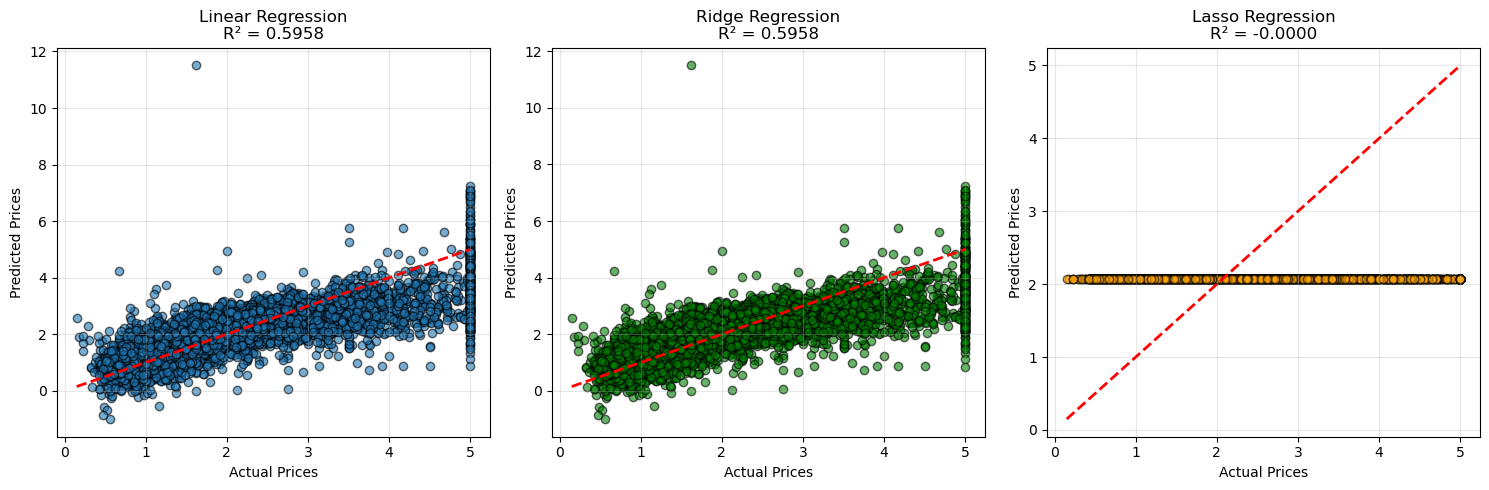

In [36]:
# Visualize predictions vs actual values for each model


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Convert to numpy arrays for safety
y_test_arr = np.array(y_test)
y_test_pred_lr_arr = np.array(y_test_pred_lr)
y_test_pred_ridge_arr = np.array(y_test_pred_ridge)
y_test_pred_lasso_arr = np.array(y_test_pred_lasso)

# Get min and max for plotting
y_min = y_test_arr.min()
y_max = y_test_arr.max()

# Linear Regression
axes[0].scatter(y_test_arr, y_test_pred_lr_arr, alpha=0.6, edgecolors='k')
axes[0].plot([y_min, y_max], [y_min, y_max], 'r--', lw=2)
axes[0].set_xlabel('Actual Prices')
axes[0].set_ylabel('Predicted Prices')
axes[0].set_title(f'Linear Regression\nR² = {lr_test_r2:.4f}')
axes[0].grid(True, alpha=0.3)

# Ridge Regression
axes[1].scatter(y_test_arr, y_test_pred_ridge_arr, alpha=0.6, color='green', edgecolors='k')
axes[1].plot([y_min, y_max], [y_min, y_max], 'r--', lw=2)
axes[1].set_xlabel('Actual Prices')
axes[1].set_ylabel('Predicted Prices')
axes[1].set_title(f'Ridge Regression\nR² = {ridge_test_r2:.4f}')
axes[1].grid(True, alpha=0.3)

# Lasso Regression
axes[2].scatter(y_test_arr, y_test_pred_lasso_arr, alpha=0.6, color='orange', edgecolors='k')
axes[2].plot([y_min, y_max], [y_min, y_max], 'r--', lw=2)
axes[2].set_xlabel('Actual Prices')
axes[2].set_ylabel('Predicted Prices')
axes[2].set_title(f'Lasso Regression\nR² = {lasso_test_r2:.4f}')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [37]:
# Save the best model for future use
import pickle

# Choose the best performing model
best_model = model_lr  # You can change this based on performance

# Save to file
with open('Model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


# Also save the scaler (important for predictions on new data)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Key Findings & Conclusion

### Model Performance Summary
The regression models were evaluated using both training and test datasets.

- **Linear Regression** achieved a Test R² score of approximately **0.60**, indicating a moderate ability to explain variations in house prices.
- **Ridge Regression** produced almost identical results to Linear Regression, suggesting that the applied regularization strength did not significantly impact the model.
- **Lasso Regression** performed poorly with a negative Test R² score, indicating underfitting. This is likely due to overly strong regularization and highlights the need for proper hyperparameter tuning.

### Key Insights from Exploratory Data Analysis
- **Median Income (MedInc)** showed the strongest positive association with house prices, making it the most influential feature.
- **Geographical features** such as Latitude and Longitude also demonstrated meaningful relationships with house prices, emphasizing the importance of location.
- Several features showed weak linear relationships with the target variable, which may limit the performance of purely linear models.

### Final Conclusion
A simple Linear Regression model provides a reasonable baseline for predicting California house prices. Ridge Regression did not significantly improve performance, while Lasso Regression underperformed due to excessive regularization.

**Future improvements include:**
- Hyperparameter tuning for Ridge and Lasso using GridSearchCV  
- Applying cross-validation for more reliable evaluation  
- Exploring non-linear models such as Random Forests or Gradient Boosting  
- Performing feature engineering to capture non-linear patterns  

This project demonstrates a complete machine learning workflow, including data exploration, preprocessing, model training, evaluation, and interpretation.
